In [1]:
library(data.table)

In [23]:
dt = fread("MatVolat CSV.csv")

In [14]:
head(dt)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
1,Strike,"0,3","1,3","2,3","3,3","4,3","5,3","6,3","7,3","8,3","9,3",15,20,25
2,800,"0,727054391","0,571172379","0,45998967","0,481028969","0,483138122","0,448527773","0,465777616","0,449026588","0,44692327","0,44186548","0,48960125","0,475462376","0,475989352"
3,1000,"0,642369609","0,52829268","0,524900584","0,466953456","0,458103396","0,452684205","0,437636535","0,414393379","0,398335717","0,420507545","0,424799282","0,40548307","0,426731893"
4,1100,"0,57441278","0,423668116","0,495875318","0,450731345","0,427112913","0,453906594","0,413285873","0,401919889","0,384599541","0,381767622","0,421874747","0,408233789","0,395861041"
5,1300,"0,531488852","0,501864284","0,456840967","0,447140612","0,410916382","0,411265953","0,405645268","0,390294856","0,394285392","0,379552365","0,40480092","0,417518057","0,407212924"
6,1400,"0,526611008","0,491858088","0,440661726","0,420534216","0,406766076","0,404819105","0,403350641","0,40315427","0,375783127","0,376733658","0,372969394","0,399950841","0,392566329"


In [24]:
# getting the first row to set it as names 
names = NULL
for(obj in dt[1]){
    if(!is.na(obj)){
        names = c(names,obj)
    } 
}
# deleting the first row in the data frame
dt = dt[-c(1),]

In [28]:
setnames(dt,names)

In [32]:
#transforming the data, to transform the ',' to '.', and convert it to numeric value
for (col in names){
    dt[,col:=as.numeric(gsub(",",".",get(col))),with=FALSE]
}

In [34]:
# check of the types of each column of my df to make sur everything is ok 
str(dt)

Classes 'data.table' and 'data.frame':	21 obs. of  14 variables:
 $ Strike: num  800 1000 1100 1300 1400 1500 2000 2200 2400 2500 ...
 $ 0,3   : num  0.727 0.642 0.574 0.531 0.527 ...
 $ 1,3   : num  0.571 0.528 0.424 0.502 0.492 ...
 $ 2,3   : num  0.46 0.525 0.496 0.457 0.441 ...
 $ 3,3   : num  0.481 0.467 0.451 0.447 0.421 ...
 $ 4,3   : num  0.483 0.458 0.427 0.411 0.407 ...
 $ 5,3   : num  0.449 0.453 0.454 0.411 0.405 ...
 $ 6,3   : num  0.466 0.438 0.413 0.406 0.403 ...
 $ 7,3   : num  0.449 0.414 0.402 0.39 0.403 ...
 $ 8,3   : num  0.447 0.398 0.385 0.394 0.376 ...
 $ 9,3   : num  0.442 0.421 0.382 0.38 0.377 ...
 $ 15    : num  0.49 0.425 0.422 0.405 0.373 ...
 $ 20    : num  0.475 0.405 0.408 0.418 0.4 ...
 $ 25    : num  0.476 0.427 0.396 0.407 0.393 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [35]:
#transforming our datatable to a dataframe to make my data processing a little bit easier ...
df = as.data.frame(dt)

In [ ]:
#displaying the variation of the option price

#### Plot de la volatilité implicite de l'option en fonction de la maturité (strike fixé) 

In [36]:
# conversion des label de maturité pour le placer sur l'axe des plots
maturity.names.converted = as.data.table(names[2:length(names)])[,V1:=as.numeric(gsub(",",".",V1))]$V1

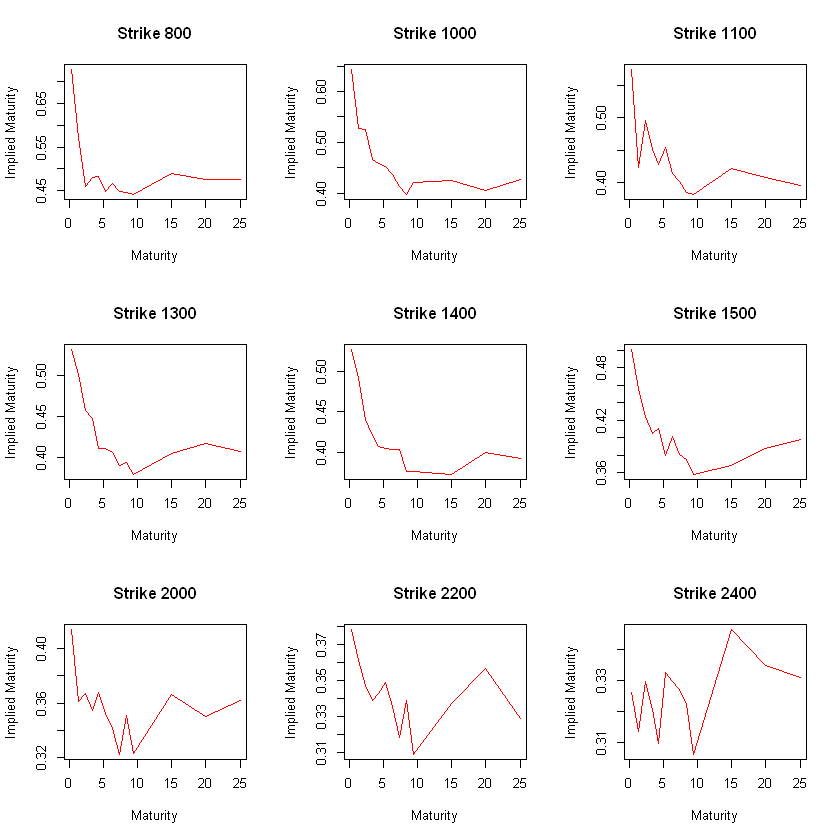

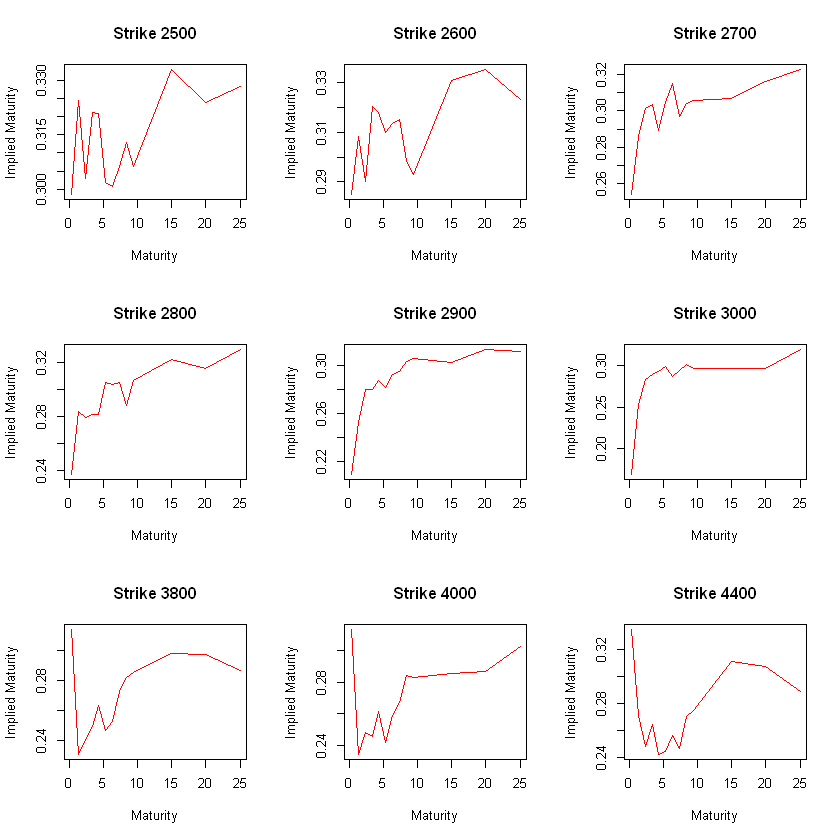

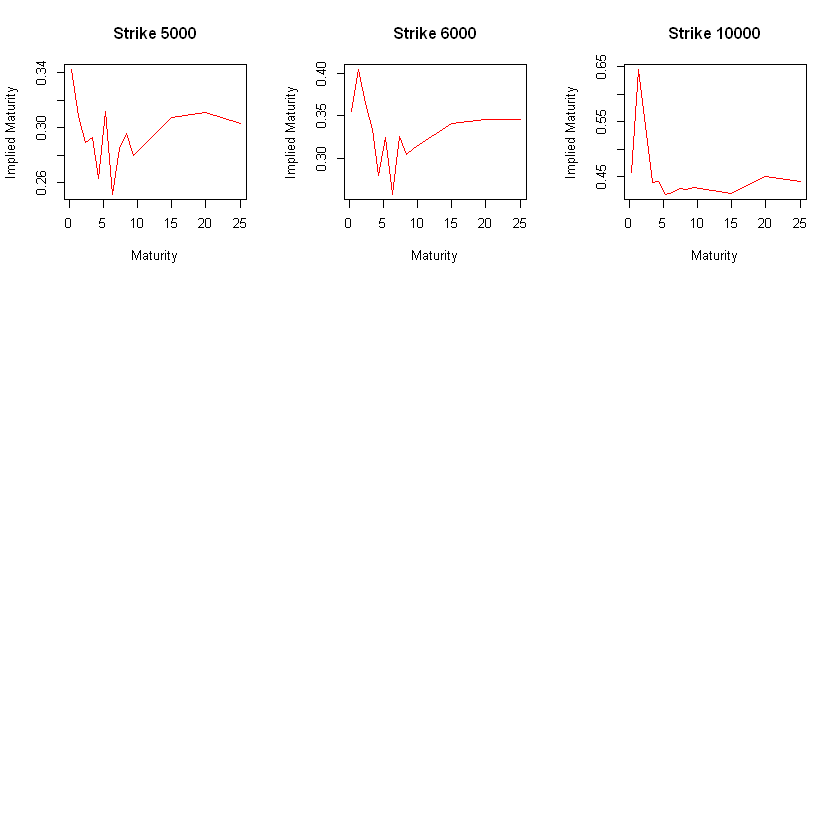

In [38]:
#on remarque que lorsque le strike est low (entre 800 et 1400) , la vola implicite decroit au fur et a mesure qu'on remonte dans la maturité
#et reste + ou - stable aux alentours de 0.40 

#a partir du strike 1500 jusqu'a à 2600 la vola implicite descends autour des 0.30 et puis commence à avoir un 
#mouvement assez volatile en fonction de la maturité 

#a partir du strike 2700 jusqu'à 3000 on observe une stabilisation de la volatilité implicite qui a tendance à 
#correler positivement avec la maturité de l'option. va de 0.22 et va stagner aux environs de 0.30


#entre 3800 et 6000 on observe encore une fois un mouvement qui n'est pas stable, autour d'une maturité implicite qui
#se situe autour des 0.28 cette fois ci .

#Globalement on peut observer que la volatilité implicite atteint toujours un pic lorsque'elle a bientôt atteint sa maturité finale
# (lorsque elle arrive a bout de maturité, c'est à dire entre 0.3 et 2.3ans)

par(mfrow=c(3,3))

for(i in seq(1,nrow(df))){
    vec.temp = c()
    for(j in seq(2,ncol(df))){
        vec.temp = c(vec.temp,df[i,j])    
    }
    plot(vec.temp ~ maturity.names.converted,
                 xlab = "Maturity in years",
                 ylab = "Implied Maturity",
                 col="red",
                 type="l",
                 main = paste("Strike",df[i,1]))
}

#### Plot de la vola implicite de l'option en fonction du strike (maturité fixée) 

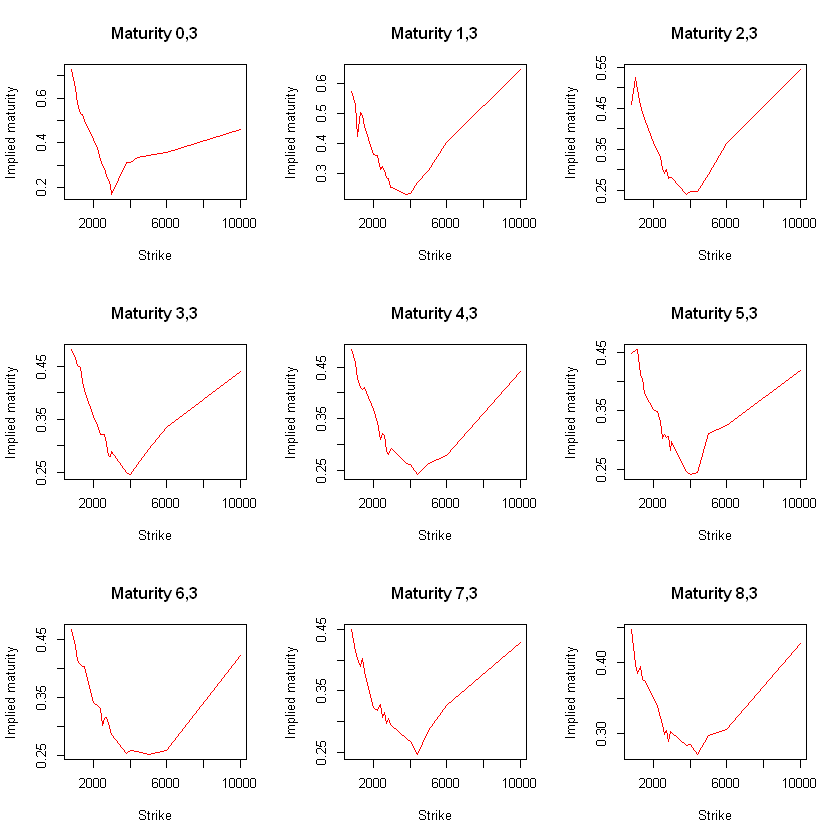

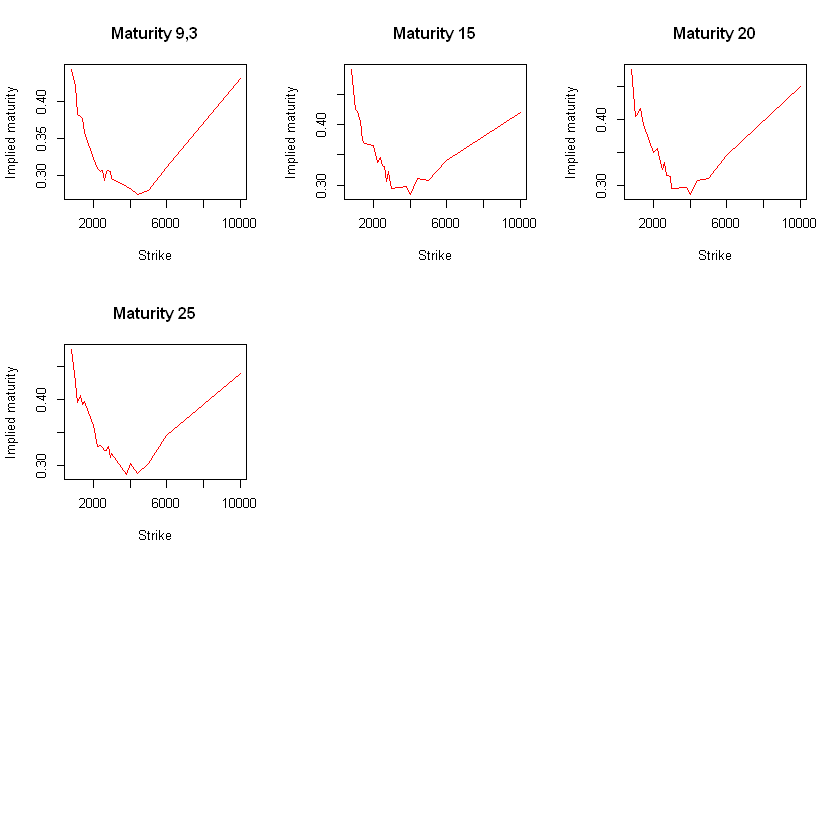

In [46]:
#en fixant la maturité et en faisant evoluer le strike, on peut observer les "smile" de volatilité.
#Ce terme désigne l'effet d'une augmentation de la volatilité implicite d'une option au fur et à mesure que son prix 
#d'exercice est éloigné du prix du sous-jacent, représenté graphiquement sous forme d'une courbe mettant en relation
#les prix d'exercice d'une série d'options avec la même échéance et le même sous-jacent, et leur volatilité implicite 
#respective. 
index = 2 
par(mfrow=c(3,3))
for(name in names(df)){
    if(name!="Strike"){
        plot(df[,name] ~ df$Strike,
             xlab = "Strike",
             ylab = "Implied maturity",
             col="red",
             type="l",
             main = paste("Maturity",names[index]))
        index = index+1
    }
}

#### prix du sous jacent en fonction de la maturité 

In [90]:
# prix ~= strike lorsque la vola implicité est minimale 

for (index_col in seq(2,ncol(dt))){
    for (index_row in seq(1,nrow(dt))){
        if( df[index_row,index_col] == min(df[,index_col]) ){
            print( paste0("Price :" , df[index_row,1]," euros  - Maturity : ",names[index_col]) )
        }
    }
}

[1] "Price :3000 euros  - Maturity : 0,3"
[1] "Price :3800 euros  - Maturity : 1,3"
[1] "Price :3800 euros  - Maturity : 2,3"
[1] "Price :4000 euros  - Maturity : 3,3"
[1] "Price :4400 euros  - Maturity : 4,3"
[1] "Price :4000 euros  - Maturity : 5,3"
[1] "Price :5000 euros  - Maturity : 6,3"
[1] "Price :4400 euros  - Maturity : 7,3"
[1] "Price :4400 euros  - Maturity : 8,3"
[1] "Price :4400 euros  - Maturity : 9,3"
[1] "Price :4000 euros  - Maturity : 15"
[1] "Price :4000 euros  - Maturity : 20"
[1] "Price :3800 euros  - Maturity : 25"


In [42]:
# creating a dataframe that will contain the strikes, and the variation  of each option price instead of the price of the option
df.var = data.frame(strike = df$Strike)
# computing the variation rate of each column ( each maturity)
range.of.df = seq(1,nrow(df))

for(name in names(df) ){
    vec.var.rate = c(0)
    
    for(i in range.of.df-1){
        var.rate = (df[i+1,name] - df[i,name]) / df[i,name]
        vec.var.rate = c(vec.var.rate, var.rate)
    }
    df.var[,name]=vec.var.rate 
}

#### plot de la VARIATION du prix de l'option pour une maturité fixée 

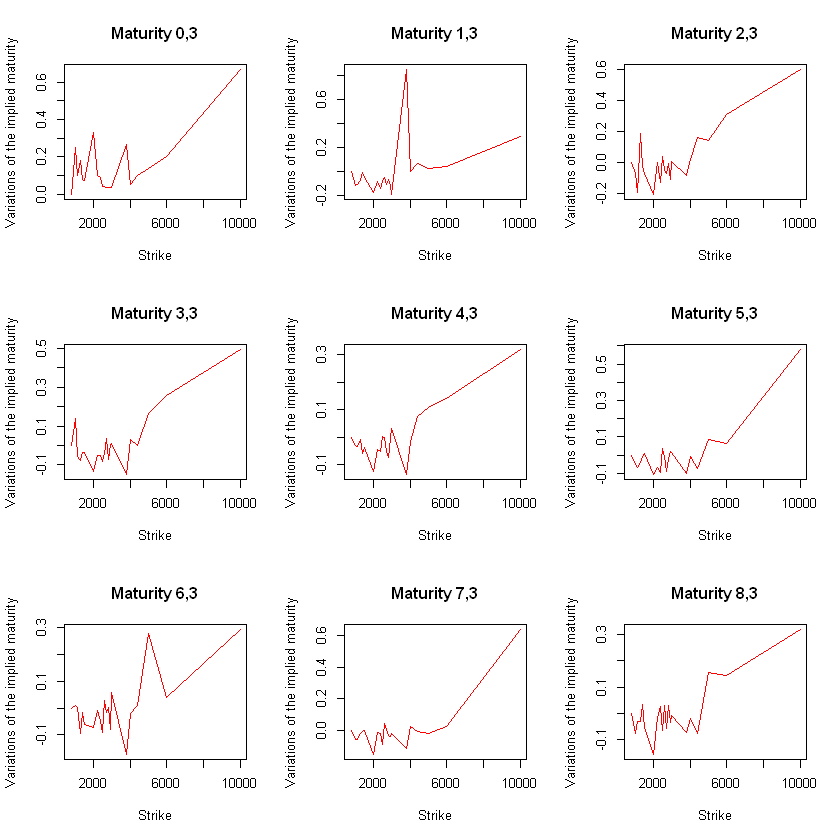

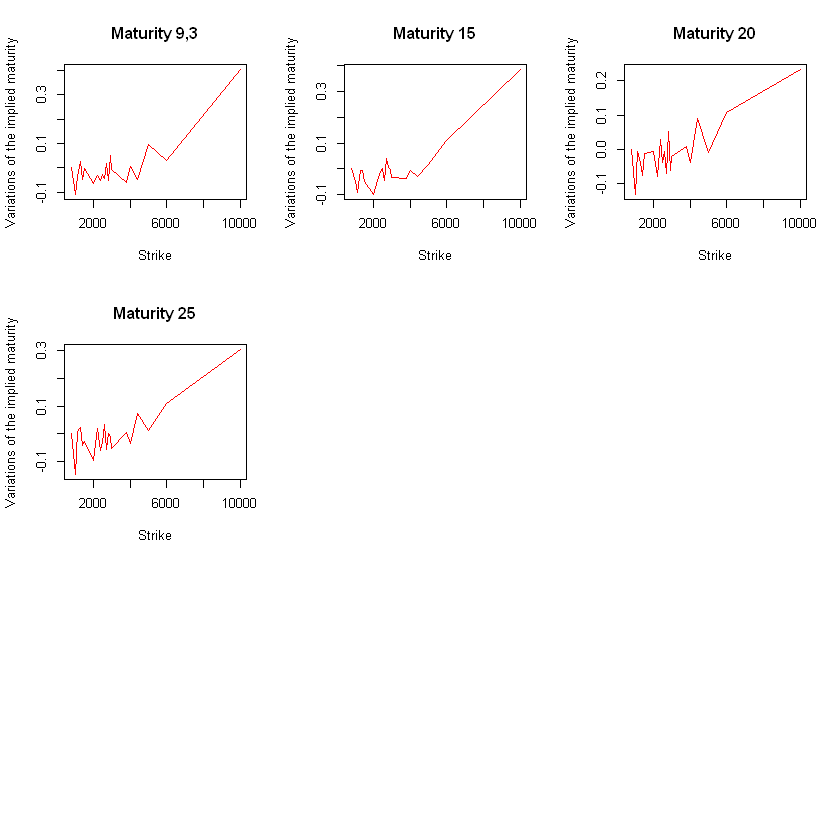

In [43]:


par(mfrow=c(3,3))
for(i in seq(2:ncol(df.var))){
    if(i>1){
     plot(df.var[,1],
          df.var[,i],
          type ="l",
          xlab = "Strike",
          ylab = "Variations of the implied maturity",
          col  = "red",
          main = paste("Maturity",names[i])
         )   
    }   
}
